# B - Analysis of a WhatsApp chat
### GROUP G - Authors: Alessia Bernacchia, Alessandra Biddiscombe

# Introduction - Points 1. through 4.
As in this project we are dealing with a dataset that contains in part personal information, we have separated the first part of the project onto a separate notebook, so as to not include sensitive data, and also permit a smoother running time when creating the graphs and visualisations. **For segments 1. through 4.** of the project, please see file **"A_whatsapp_analysis"**.


### Various imports

In [1]:
# Calculation and utility imports
import pandas as pd
import numpy as np
import emoji
import os


# Plotting

# plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Permits to generate graphics exportable in html format
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# others
import matplotlib.pyplot as plt
import seaborn as sns

# Statistic
import scipy.stats as scis
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import norm

### Dataset imports
These datasets were previously created with the code in the file "A_whatsapp_analysis".

In [2]:
dataframe = pd.read_csv('dataset/complete_dataframe.csv')
df_under_30 = pd.read_csv('dataset/under30_data.csv')
df_over_30 = pd.read_csv('dataset/over30_data.csv')
df_age = pd.read_csv('dataset/age_data.csv')

## 5. Data Exploration
Develop an intuitive understanding of the data through:
- descriptive statistics over all observations and over meaningful groups (pandas groupby)
- visualizations (scatterplots, histograms, box plots, bar plots, etc.)

##### - verifies that the dataframes are cleaned correctly

In [3]:
for df in [dataframe, df_age, df_under_30, df_over_30]:
    if np.sum(df.isna().sum()) == 0:
        print(f'The dataframe is cleaned.')

The dataframe is cleaned.
The dataframe is cleaned.
The dataframe is cleaned.
The dataframe is cleaned.


##### - show the data

In [4]:
dataframe.sample(5)

,Author,age,age_group,n_letters,n_word,n_emoji,n_Url,Media_Count,MessageCount,mean_letters_x_mess,mean_words_x_mess,mean_emojis_x_mess
136,KML_30,30,26-30,1036.0,204.0,0,1,0,36,28.78,5.67,0.00
13,TTL_19,19,15-20,1526.0,337.0,0,0,6,48,31.79,7.02,0.00
176,ZKW_46,46,46-50,1373.0,272.0,2,0,2,25,54.92,10.88,0.08
77,CHL_21,21,21-25,671.0,179.0,0,0,1,37,18.14,4.84,0.00
104,DXH_21,21,21-25,2948.0,670.0,0,0,6,96,30.71,6.98,0.00


In [5]:
df_age_group_counter = dataframe['age_group'].value_counts().reset_index()
fig = px.pie(df_age_group_counter, names='age_group', values='count', title='Distribution of the age groups')
fig.show()

**Comment on above graph:**
The pie chart shows an imbalance in the age groups of our dataset. It appears that the **majority of the data is concentrated in the 15-25 age range**, which makes sense given that the data was collected from our friends, friends of our friends, relatives and friends of our relatives. This could potentially introduce a **bias** in any analysis or model trained on this data, as the results **would be more reflective of the characteristics of these age groups**.   
     
In light of these considerations,to address potential biases in our dataset and acknowledging the premise that an individual's communication style may be influenced by the professional sphere, as circumstances permit, we plan to divide our analysis into two distict age groups: those under 30 and those over 30.

In [6]:
df_age

,age_group,n_people,n_letters,n_word,n_Url,Media_Count,n_emoji,MessageCount,mean_letters_x_mess,mean_words_x_mess,mean_emojis_x_mess
0,15-20,58,572276.0,119591.0,769,2666,10,17723,32.29,6.75,0.00
1,21-25,67,3376660.0,683010.0,518,8474,11338,89201,37.85,7.66,0.13
2,26-30,13,57648.0,11627.0,25,132,202,1831,31.48,6.35,0.11
3,31-35,7,70842.0,14108.0,13,302,432,2079,34.08,6.79,0.21
4,36-40,13,99423.0,19118.0,32,902,657,2262,43.95,8.45,0.29
5,41-45,17,103752.0,18987.0,49,224,510,1237,83.87,15.35,0.41
6,46-50,9,139038.0,28118.0,12,304,104,1636,84.99,17.19,0.06
7,50+,7,128144.0,25490.0,63,274,83,1906,67.23,13.37,0.04


In [7]:
df_under_30.describe()

,age,n_letters,n_word,n_emoji,n_Url,Media_Count,MessageCount,mean_letters_x_mess,mean_words_x_mess,mean_emojis_x_mess
count,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,21.117647,2.944379e+04,5983.610294,84.926471,9.639706,82.882353,799.139706,36.434412,7.521176,0.075588
std,2.322383,1.201824e+05,23791.426210,424.858349,55.788048,292.859771,2803.645381,17.993952,3.208407,0.169953
min,16.000000,4.990000e+02,117.000000,0.000000,0.000000,0.000000,25.000000,13.780000,3.180000,0.000000
25%,20.000000,1.767250e+03,360.250000,0.000000,0.000000,3.000000,55.000000,23.992500,5.277500,0.000000
50%,21.000000,4.403000e+03,883.000000,0.000000,1.000000,9.000000,116.500000,32.470000,6.950000,0.000000
75%,21.000000,9.918500e+03,2217.500000,5.250000,3.000000,25.750000,298.500000,41.980000,8.442500,0.050000
max,29.000000,1.030826e+06,201162.000000,3398.000000,627.000000,1882.000000,24675.000000,113.980000,21.620000,1.150000


In [8]:
df_over_30.describe()

,age,n_letters,n_word,n_emoji,n_Url,Media_Count,MessageCount,mean_letters_x_mess,mean_words_x_mess,mean_emojis_x_mess
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,42.327273,9880.509091,1932.327273,32.472727,3.090909,36.472727,167.127273,69.923273,13.219455,0.322909
std,7.198391,16360.187475,3372.212352,59.392871,6.441396,79.885996,295.096912,40.968667,7.542703,0.427532
min,30.000000,890.000000,173.000000,0.000000,0.000000,0.000000,25.000000,8.730000,1.980000,0.000000
25%,37.500000,1765.000000,340.000000,4.000000,0.000000,3.000000,34.500000,37.385000,7.480000,0.065000
50%,42.000000,3918.000000,744.000000,11.000000,1.000000,7.000000,62.000000,65.690000,12.350000,0.220000
75%,46.500000,9301.000000,1930.000000,37.000000,4.000000,27.000000,143.500000,91.315000,17.220000,0.440000
max,63.000000,91943.000000,18809.000000,352.000000,43.000000,508.000000,1780.000000,207.190000,39.730000,2.710000


In [9]:
df_under_30.describe().loc['mean']

age                       21.117647
n_letters              29443.786765
n_word                  5983.610294
n_emoji                   84.926471
n_Url                      9.639706
Media_Count               82.882353
MessageCount             799.139706
mean_letters_x_mess       36.434412
mean_words_x_mess          7.521176
mean_emojis_x_mess         0.075588
Name: mean, dtype: float64

In [10]:
df_over_30.describe().loc['mean']

age                      42.327273
n_letters              9880.509091
n_word                 1932.327273
n_emoji                  32.472727
n_Url                     3.090909
Media_Count              36.472727
MessageCount            167.127273
mean_letters_x_mess      69.923273
mean_words_x_mess        13.219455
mean_emojis_x_mess        0.322909
Name: mean, dtype: float64

Examining the statistics from the under 30 and over 30 groups, in particular the mean line, reveals interesting **differences in messagging behaviour**.   
Younger individuals (under 30) tend to send significantly more messages compared to their older counterparts (over 30).   
Specifically:
- The general mean of letters sent from a person is 29443 for the under 30 and 9880 for the over 30.
- The general mean of words sent from a person is 5983 for the under 30 and 1932 for the over 30.
- The general mean of emojis sent from a person is 89 for the under 30 and 32 for the over 30.   
- The general mean of messages sent from a person is 799 for the under 30 and 167 for the over 30.  
This findings suggest that **younger people communicate more frequently and extensively, using more letters, words and emojis overall**.   
    
However, when we look at the content of **individual messages** we see: 
- The general mean of letters per message of a person is 36 for the under 30 and 69 for the over 30.
- The general mean of words per message of a person is 7 for the under 30 and 13 for the over 30.
- The general mean of emojis per message of a person is 0.07 for the under 30 and 0.3 for the over 30.     

This implies that despite younger individuals sending more messages, **each message tend to be shorter, containing fewer words and letters** than those sent by older individuals.    
    
This evidence a **generational difference in communication styles**.    
***Younger people may prefer brief, rapid exchanges, while older people tend to compose longer, more detailed messages.***



##### - distribution plots of the individual messages' variable

In [11]:
def distribution_plot_of(df, variable):
    fig = px.histogram(x=df[variable])
    #fig = go.Figure(data=[go.Histogram(x=df[variable], nbinsx=25, histnorm='probability')])

    fig.update_layout(title_text='Distribution of '+variable,
                       xaxis_title=variable,
                       yaxis_title='Density')
    return fig


In [12]:
mean_var = ['mean_letters_x_mess', 'mean_words_x_mess', 'mean_emojis_x_mess']

# creates a subplot of the distributions
subplot = make_subplots(rows=2, cols=3)
counter = 1 # to change column
for var in mean_var:
    
    # for each variable creates its distribution plot
    f = distribution_plot_of(dataframe, var) # histogram distribution
    b = px.box(x=dataframe[var]) # boxplot distribution
    
    # and add it to the subplot
    for trace in f.data:
        # add the distribution histogram
        subplot.add_trace(trace, col=counter, row=1)
        subplot.update_xaxes(title=var, col=counter, row=1)
        subplot.update_yaxes(title="density", col=counter, row=1)
        
    for trace in b.data:
        # add the distribution boxplot
        subplot.add_trace(trace, col=counter, row=2)
        subplot.update_xaxes(title=var, col=counter, row=2)
        
    counter += 1
        
# set a title and show the subplot
subplot.update_layout(title_text='Distribution of the individual messages data')
subplot.show()

**Comment on above graphs:**
The histograms for mean letters per message and for mean words per message show a **right skewed distribution**, these trend suggest that users tend to use fewer letters and words in their messages.   
While the histogram of mean emojis per message appears to be **less skewed**, the usage of emojis varies more closely.   
The boxplots reveal the **presence of outliers** in all three categories, suggesting that there are some messages with sisgnificantly higher average.   

In [13]:
mean_var = ['mean_letters_x_mess', 'mean_words_x_mess', 'mean_emojis_x_mess']

# creates a subplot of the distributions across the age groups
subplot = make_subplots(rows=2, cols=3)

counter = 1 # to change column
for var in mean_var:
    
    # creates variable distribution plot by the age groups
    f = px.bar(df_age, x='age_group', y=var, color='age_group')
    # creates the variable boxplots by age group
    b = px.box(dataframe, x='age_group', y= var, color = 'age_group',
             title= 'Distribution of '+var+' for message by age groups')
    
    # and add them to the subplot
    # adds the distribution barplot by age groups
    for trace in f.data:
        subplot.add_trace(trace, col=counter, row=1)
        subplot.update_xaxes(title='age group', col=counter, row=1)
        subplot.update_yaxes(title=var, col=counter, row=1)
        
    # adds the boxplots by age groups
    for trace in b.data:
        # add the distribution histogram
        subplot.add_trace(trace, col=counter, row=2)
        subplot.update_xaxes(title='age group', col=counter, row=2)
        subplot.update_yaxes(title=var, col=counter, row=2)

    counter += 1
        
# set a title and show the subplot
subplot.update_layout(title_text="Age group individual messages' data")
subplot.update_layout(height=900, width=2000, bargap=0, showlegend=False)
subplot.show()

**Comment on above graphs:**
The histograms shows the frequency distribution of these variables. It appears that **mean letters per message** and **mean words per message** have similar distributions across age groups, with most of the data skewed towards the lower end. This suggests that the majority of messages contain a lower average number of letters and words. However, the distribution for **mean emojis per message** is more varied, indicating a diverse usage of emojis across ages.   
   
The boxplots provide a statistical summary of these variables. The median (line inside the box) for **mean letters per message** and **mean words per message** appears closer to the bottom of the box, suggesting a right-skewed distribution (as it is in the histograms). This means most users tend to use fewer letters and words in their messages, The **mean emojis per message** boxplot shows more variability, indicating a diverse usage of emojis across messages. In all three boxplots there are noticeable outliers (dots out of the boxes), expecially in **mean letters per message** variable. This could indicate that there are some users who use significantly more letters in their messages than others.

##### - distribution of  chats data across age

In [14]:
fig = px.bar(df_age, x=df_age['age_group'], y=["MessageCount", "Media_Count", "n_Url"], 
             labels={'MessageCount': 'n_messages', "Media_Count": "n_media", "n_Url":"n_url"}, barmode='group')
fig.show()

**Comment on above graph:**
This bar plot shows the number of messages in blue, the number of media sent in red, and the number of Urls in green, per age group. This shows what kind of an imbalance in our data we have, not only putting in perspective the sheer number of texts collectd for the lower age groups, but also showing the tendency of most ages is to use WhatsApp as a quick and easy communication tool for mostly texts. For better understanding and breakdown of the data, we will further analyse the counts of each kind of datapoint, in its own scale.

In [15]:
counter_var = ['MessageCount', 'Media_Count', 'n_Url']
df_over = dataframe.query("age > 30")
df_under = dataframe.query("age <= 30")

subplot = make_subplots(rows=3, cols=2, subplot_titles=['Under 30s', 'Over 30s'])

counter = 1 # to change row

for var in counter_var:
    # creates variable distribution barplot by the age under 30
    u = px.bar(df_under.groupby("age")[var].mean())
    # creates variable distribution barplot by the age under 30
    o = px.bar(df_over.groupby("age")[var].mean())
    
    # and add them to the subplot
    # adds the distribution barplot by age of under 30
    for trace in u.data:
        subplot.add_trace(trace, col=1, row=counter)
        subplot.update_xaxes(title='age', col=1, row=counter)
        subplot.update_yaxes(title=var, col=1, row=counter)
        
    # adds the distribution barplot by age of under 30
    for trace in o.data:
        subplot.add_trace(trace, col=2, row=counter)
        subplot.update_xaxes(title='age', col=2, row=counter)
        subplot.update_yaxes(title=var, col=2, row=counter)

    counter += 1
        
# set a title and show the subplot
subplot.update_layout(title_text="Age mean counters data")
subplot.update_layout(height=1000, width=1500, bargap=0, showlegend=False)
subplot.show()


**Comment on above graphs:**
Here we are analysing the same data as the graph a cell above, which contains information about the counts of messages, media and Urls sent via text, separated by age. We can first of all notice that those ages that send the most messages, also send the most media etc, but interestingly, in the older groups, we notice that our most experienced person in the dataframe sends an awe-inspiring amount of links, as opposed to any other age.

n_emoji    1667.0
dtype: float64


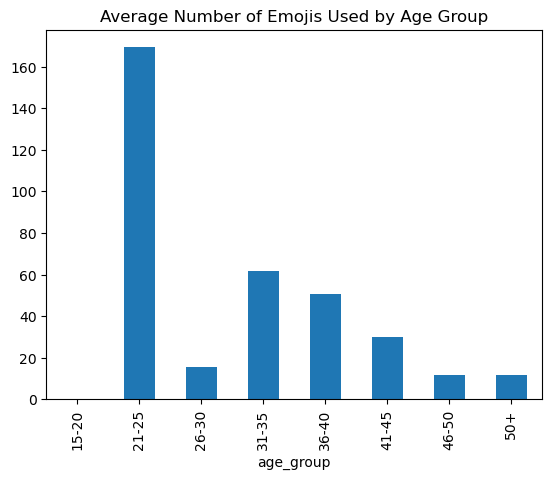

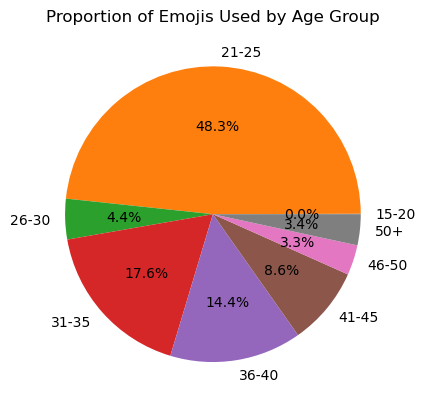

In [16]:
emoji_usage = dataframe.groupby('age_group')['n_emoji'].mean()
#print(emoji_usage)
print(df_age[['n_emoji']].mean())
emoji_usage.plot(kind='bar')
plt.title('Average Number of Emojis Used by Age Group')
plt.show()

emoji_usage.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Emojis Used by Age Group')
plt.ylabel('')
plt.show()


**Comment on above graphs:**
Both graphs show data relating to emoji use by age. The first focuses on the average number of emojis used by each age group over all their texts, whereas the second shows out of all emojis sent, which age group was responsible for sending the most. We see some bias in the visualisation, due to the huge number of messages sent by the people who are under 30 years old, and instead notice that the number of emojis used by the older generation is rather small and reflects the smaller quantity of messages they send. In later visualisations, we may notice that the proportion of emojis to total messages sent by age may look a little different.

Plotting number of emoji, number of letters and number of words used by each person, relative to their age. This will allow us to see whether there are any particular trends among people axcording to their age in the use .

In [17]:
mean_mess_series = dataframe.groupby("age")["MessageCount"].mean()
mean_word_series = dataframe.groupby("age")["mean_words_x_mess"].mean()
mean_lett_series = dataframe.groupby('age')['mean_letters_x_mess'].mean()
mean_emoji_series = dataframe.groupby('age')['mean_emojis_x_mess'].mean()

mean_media_count = dataframe.get(['age', 'Media_Count', 'MessageCount']).copy()
mean_media_count['mean_media_x_mess'] = mean_media_count['Media_Count'] / mean_media_count['MessageCount']
mean_media_series = mean_media_count.groupby('age')['mean_media_x_mess'].mean()

                                                       
# Creating subplots to better visualise emoji and media use, as the scale is relatively small
# We create these first as we also want to superimpose them on the first graph to be shown
fig2 = px.line(mean_emoji_series, color_discrete_sequence=px.colors.qualitative.Pastel)
fig3 = px.line(mean_media_series, color_discrete_sequence=px.colors.qualitative.Vivid)

# creating a plot with the means by age of various info from our dataframe
fig1 = px.line(mean_word_series, color_discrete_sequence=px.colors.qualitative.Dark2)
fig1.add_trace(px.line(mean_lett_series, color_discrete_sequence=px.colors.qualitative.Alphabet).data[0])
fig1.add_trace(fig2.data[0])
fig1.add_trace(fig3.data[0])

# Creating the subplots
subplot = make_subplots(rows=3, cols=1, subplot_titles=['Mean words, letters, media and emoji use by age', 
                                                        'Rescaled mean emoji use by age',
                                                        'Rescaled mean media use by age'])

for trace in fig1.data:
    subplot.add_trace(trace, col=1, row=1)
    subplot.update_xaxes(title='age', col=1, row=1)
    subplot.update_yaxes(title='mean count', col=1, row=1)
for trace in fig2.data:
    subplot.add_trace(trace, col=1, row=2)
    subplot.update_xaxes(title='age', col=1, row=2)
    subplot.update_yaxes(title='mean count', col=1, row=2)
for trace in fig3.data:
    subplot.add_trace(trace, col=1, row=3)
    subplot.update_xaxes(title='age', col=1, row=3)
    subplot.update_yaxes(title='mean count', col=1, row=3)

    subplot.update_layout(title_text="Mean message contents by age")
subplot.update_layout(height=1000, width=950)
subplot.show()

**Comment on above graphs:**
We notice that there is a lot more variation around the ages where we have less data, whereas at the beginning of the graphs, for the ages of 20, we have a slightly smoother plot. Other than noticing the different amounts of data, we can also see that whereas the use of emojis by age is rather varied through all ages, the length of the messages (seen in word and letter mean usage) tends to be higher in the older sidde of the population.

## ==========================================================

## 6. Hypothesis testing
Use hypothesis tests to confirm or reject some hypothesis of interest about the parameters of the population involved in your study.

In [18]:
def plot_gaussian_distribution(mu=0, sigma=1):
    # generates data for x-axis (3 is a random number)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    
    # generates data for y-axis following the Gaussian distribution
    y = scis.norm.pdf(x, mu, sigma)
    
    # creates the normal Gaussian distribution
    trace_pdf = go.Scatter(x=x, y=y, mode='lines',
                     name='Normal Gaussian Distribution')
    # creates the layout
    layout = go.Layout(title='Gaussian Distribution',
                       xaxis=dict(title='Z-score or T-score'),
                       yaxis=dict(title='probability density'))
    
    # create the figure
    fig = go.Figure(data=[trace_pdf], layout=layout)
    
    return fig

In [19]:
def plot_distribution_with_acceptance_region(bound_1, bound_2=0, mu=0, sigma=1, type_hypothesis='two-tailed', data='data', stat=None, obs=None):
    assert type_hypothesis in ['two-tailed', 'left-tailed', 'right-tailed'], 'Type of hypothesis not in the system'
    # generates data for x-axis
    # (3 is a value that permits to cover until 99.7% the data of a normal distribution)
    x = np.linspace(min(bound_1, mu - 3*sigma), max(bound_2, mu + 3*sigma), 100)
    
    # generates data for y-axis following the Gaussian distribution
    y = scis.norm.pdf(x, mu, sigma)
    
    # generates the normal gaussian distribution plot
    fig = plot_gaussian_distribution(mu, sigma)
    
    # sets boundaries
    if type_hypothesis == 'two-tailed':
        lb = min(bound_1, bound_2)
        ub = max(bound_1, bound_2)
    elif type_hypothesis == 'right-tailed':
        lb = min(x)
        ub = bound_1
    elif type_hypothesis == 'left-tailed':
        lb = bound_1
        ub = max(x)
    
    # creates the line of the boundaries of the acceptance region and add them to the figure
    if type_hypothesis != 'right-tailed':
        lower_bound = go.Scatter(x=[lb, lb], y=[0, scis.norm.pdf(lb, mu, sigma)], mode = 'lines',
                                name='Lower Bound', line=dict(color='green'))
        fig.add_trace(lower_bound)

    if type_hypothesis != 'left-tailed':
        upper_bound = go.Scatter(x=[ub, ub], y=[0, scis.norm.pdf(ub, mu, sigma)], mode = 'lines',
                                name='Upper Bound', line=dict(color='green'))
        fig.add_trace(upper_bound)
            
    # creates the highlight of the acceptance region
    acceptance_region = go.Scatter(x=np.linspace(lb, ub, 100), y=scis.norm.pdf(np.linspace(lb, ub, 100), mu, sigma),
                                   fill='tozeroy', mode='none', fillcolor='rgba(0,200,83,0.5)',
                                   name='Acceptance Region')
    
    # create the layout
    if mu==0 and sigma==1:
        layout = go.Layout(title = 'Hypothesis Testing with Gaussian Distribution',
                           xaxis=dict(title='z-score'),
                           yaxis=dict(title='probability density'))
    
    else:
        layout = go.Layout(title = 'Hypothesis Testing with Gaussian Distribution of '+ data,
                           xaxis=dict(title=data),
                           yaxis=dict(title='probability density'))
    
    # add the acceptance region and the layout to the previous figure
    fig.add_trace(acceptance_region)
    fig.update_layout(layout)
    
    if stat and mu==0 and sigma==1:
        fig.add_vline(x=stat)
    elif obs:
        fig.add_vline(x=obs)
    
    return fig

In [20]:
def plot_distribution_with_rejection_region(bound_1, bound_2=0, mu=0, sigma=1, type_hypothesis='two-tailed', data='data', stat=None, obs=None):
    assert type_hypothesis in ['two-tailed', 'left-tailed', 'right-tailed'], 'Type of hypothesis not in the system'
    
    # generates data for x-axis
    # (3 is a value that permits to cover until 99.7% the data of a normal distribution)
    x = np.linspace(min(bound_1, mu - 3*sigma), max(bound_2, mu + 3*sigma), 100)
    
    # generates data for y-axis following the Gaussian distribution
    y = scis.norm.pdf(x, mu, sigma)
    
    # generates the normal gaussian distribution plot
    fig = plot_gaussian_distribution(mu, sigma)
    
    # sets boundaries
    if type_hypothesis == 'two-tailed':
        lb = min(bound_1, bound_2)
        ub = max(bound_1, bound_2)
    elif type_hypothesis == 'right-tailed':
        lb = bound_1
        ub = min(x)
    elif type_hypothesis == 'left-tailed':
        lb = max(x)
        ub = bound_1
    
    # creates the line of the boundaries of the rejection region
    if type_hypothesis != 'right-tailed':
        lower_bound = go.Scatter(x=[ub, ub], y=[0, scis.norm.pdf(ub, mu, sigma)], mode = 'lines',
                                name='Lower Bound', line=dict(color='red'))
        fig.add_trace(lower_bound)
        

    if type_hypothesis != 'left-tailed':
        upper_bound = go.Scatter(x=[lb, lb], y=[0, scis.norm.pdf(lb, mu, sigma)], mode = 'lines',
                                name='Upper Bound', line=dict(color='red'))
        fig.add_trace(upper_bound)
            
    # creates the highlight of the rejection region
    if type_hypothesis != 'two-tailed':
        rejection_region = go.Scatter(x=np.linspace(lb, ub, 100), y=scis.norm.pdf(np.linspace(lb, ub, 100), mu, sigma),
                                       fill='tozeroy', mode='none', fillcolor='rgba(255,0,0,0.5)',
                                       name='Rejection Region')
        fig.add_trace(rejection_region)
        
    if type_hypothesis == 'two-tailed':
        left_tail = go.Scatter(x=np.linspace(min(x), lb, 100), y=scis.norm.pdf(np.linspace(min(x), lb, 100), mu, sigma),
                                       fill='tozeroy', mode='none', fillcolor='rgba(255,0,0,0.5)',
                                       name='Rejection Region')
        
        right_tail = go.Scatter(x=np.linspace(ub, max(x), 100), y=scis.norm.pdf(np.linspace(ub, max(x), 100), mu, sigma),
                                       fill='tozeroy', mode='none', fillcolor='rgba(255,0,0,0.5)',
                                       name='Rejection Region')
        fig.add_trace(left_tail)
        fig.add_trace(right_tail)
    
    # create the layout
    if mu==0 and sigma==1:
        layout = go.Layout(title = 'Hypothesis Testing with Gaussian Distribution',
                           xaxis=dict(title='z-score'),
                           yaxis=dict(title='probability density'))
    
    else:
        layout = go.Layout(title = 'Hypothesis Testing with Gaussian Distribution of '+ data,
                           xaxis=dict(title=data),
                           yaxis=dict(title='probability density'))
    
    # add the acceptance region and the layout to the previous figure
    fig.update_layout(layout)
    
    # add the observation line
    if stat and mu==0 and sigma==1:
        fig.add_vline(x=stat)
    elif obs:
        fig.add_vline(x=obs)
    
    return fig

### # Hypothesis test for the difference between means

Through the visualisation of our collected data, we have noticed there are many differences in the styles of texting between people of different ages. To see how true this difference is, and test the limits of our theory, we phrase the first hypothesis test around the length of messages send by the two major age groups, over and under 30 years old.

Note that for this test, messages that contain only media or only emojis are counted as empty messages, with a word count of 0.

We start by visualising the data with this particular hypothesis in mind. The following graphs plot the number of words in each message with the author's age as a reference. 

In [21]:
fig = px.scatter(dataframe, x=dataframe["age"], y=dataframe["mean_words_x_mess"])
fig.show()

The initial visualisation is a bit too chaotic, but it's still possible to see that there is a large clump of datapoints at and around the age of 20 in the lower number of words, so our hypothesis may still hold. For a better idea, let's plot the means of each age's average message length in words.


In [22]:
mean_words_series = dataframe.groupby("age").describe()["mean_words_x_mess"]["mean"]
fig = px.bar(mean_words_series)
fig.show()

Here we notice many spikes in the data as the author gets older, that may be attributed to low numbers of samples for those age groups. To smooth it out, the final visualisation shows the mean of the number of messages from those of under 30 years of age compared to those from over 30. 

In [23]:
two_mean_list = [dataframe.loc[dataframe["age"]<30,:]["mean_words_x_mess"].mean(), dataframe.loc[dataframe["age"]>=30,:]["mean_words_x_mess"].mean()]

fig = px.bar(two_mean_list)
fig.show()

After this visualisation, we can be pretty sure that the means are different.

##### - state the test

Having seen some information about the data, we phrase the hypothesis test in order to compare the age groups, and attempt to prove that the message lengths are different between them. 
The null hypothesis states that there is no difference between the means, the alternate hypothesis claims there is one.

H0: $\mu_{under30meanWords} = \mu_{over30meanWords} \$ 

H1: $\mu_{under30meanWords} \neq \mu_{over30meanWords}$ 

Rephrased, we have:

H0: $\mu_{under30meanWords} - \mu_{over30meanWords} = 0 \$

H1: $\mu_{under30meanWords} - \mu_{over30meanWords} \neq 0 \$


##### - collect data

For a test on the difference between means we need two datasets, and we need to know that both contain more than 30 (or ideally for us, 50) datapoints.

In [24]:
# For this test we use the age separated dataframes originally created from our data
display(df_under_30.head(), df_over_30.head())
print("\nlength of first dataset:", len(df_under_30), "\nlength of second dataset:", len(df_over_30))

,Author,age,age_group,n_letters,n_word,n_emoji,n_Url,Media_Count,MessageCount,mean_letters_x_mess,mean_words_x_mess,mean_emojis_x_mess
0,OOK_16,16,15-20,5243.0,802.0,5,10,4,46,113.98,17.43,0.11
1,AYL_18,18,15-20,1765.0,370.0,0,0,5,54,32.69,6.85,0.00
2,ZHP_19,19,15-20,981.0,238.0,0,0,3,55,17.84,4.33,0.00
3,RCS_19,19,15-20,1009.0,235.0,0,0,0,30,33.63,7.83,0.00
4,DGR_19,19,15-20,7870.0,1827.0,0,0,5,246,31.99,7.43,0.00


,Author,age,age_group,n_letters,n_word,n_emoji,n_Url,Media_Count,MessageCount,mean_letters_x_mess,mean_words_x_mess,mean_emojis_x_mess
0,AKL_30,30,26-30,1193.0,253.0,0,0,0,36,33.14,7.03,0.00
1,KML_30,30,26-30,1036.0,204.0,0,1,0,36,28.78,5.67,0.00
2,EYE_31,31,31-35,890.0,173.0,7,0,6,28,31.79,6.18,0.25
3,OOK_31,31,31-35,2757.0,523.0,8,0,12,30,91.90,17.43,0.27
4,MB_32,32,31-35,56301.0,11330.0,352,6,256,1780,31.63,6.37,0.20



length of first dataset: 136 
length of second dataset: 55


Next, calculate the sample means, and sample deviation.
Remember that we do not have any true data, only sampled data, so we will be using $s_{pooled}$ and calculating our p-value using a t-test.

In [25]:
# Calculate our dataset means for the hypothesis test
xbar_under = df_under_30["mean_words_x_mess"].mean() 
xbar_over = df_over_30["mean_words_x_mess"].mean()

# Defining standard deviation
s_under = df_under_30["mean_words_x_mess"].std()
s_over = df_over_30["mean_words_x_mess"].std()

# Sample size
n_under = df_under_30["mean_words_x_mess"].notna().sum()
n_over = df_over_30["mean_words_x_mess"].notna().sum()

# A quick look at the values
print(f"xbar_under: {xbar_under},\nxbar_over: {xbar_over},\ns_under: {s_under},\ns_over: {s_over},\nn_under {n_under},\nn_over: {n_over}")

xbar_under: 7.5211764705882365,
xbar_over: 13.219454545454548,
s_under: 3.208406563971992,
s_over: 7.542703469108115,
n_under 136,
n_over: 55


##### - calculate standard error

Since we are conducting a hypothesis test on data for which we do not know the true values, we must first calculate degrees of freedom of the test, with which we can then determine the pooled standard deviation, and then the standard error.

In [26]:
# Degrees of freedom: size of the first dataset minus one plus the size of the other dataset minus one
dof = n_under + n_over - 2

# Calculating the pooled std dev for the two datasets
s_pooled = np.sqrt( (s_under**2 *(n_under-1) + n_over**2 * (n_over-1)) / dof)

# Calculating standard error
se = s_pooled * np.sqrt(1/n_under + 1/n_over)

# A quick look at the values
print(f"s_pooled: {s_pooled},\ndof: {dof},\nse: {se}")

s_pooled: 29.52352418810342,
dof: 189,
se: 4.717740862597524


#### - compute if it is a Gaussian
We have just seen that the lenghts of the dataset are 136 and 55, both largely greater than 30.   
We can assume that the data could follows a gaussian distribution.

##### - statistic

As the final step, we need to find the sample statistic, before being able to execute the t-test.

In [27]:
# Calculate the difference between the sample means, with which to calculate the statistic
xbar_diff = xbar_under - xbar_over
statistic = (xbar_diff) / se

print(f"statistic: {statistic}")

statistic: -1.2078404136273218


##### - critical values and acceptance region

In [28]:
# The alpha value that allows us to reject the initial null hypothesis
alpha = 0.05

# t_alpha/2 and t_1-alpha/2
critical_value_left = scis.t.ppf(alpha / 2, dof)
critical_value_right = scis.t.ppf(1 - alpha / 2, dof)
print(f"t_alpha/2: {critical_value_left},\nt_1-alpha/2: {critical_value_right}")

t_alpha/2: -1.9725950790966158,
t_1-alpha/2: 1.9725950790966154


In [29]:
mu0 = 0
lb = critical_value_left
ub = critical_value_right
print(f"lower bound: {critical_value_left},\nupper bound: {critical_value_right}")
print(f"the acceptance region is : [{critical_value_left}, {critical_value_right}]")

lower bound: -1.9725950790966158,
upper bound: 1.9725950790966154
the acceptance region is : [-1.9725950790966158, 1.9725950790966154]


In [30]:
plot_distribution_with_acceptance_region(lb, ub, stat=statistic)

We can state that the statistic is in the acceptance region, meaning that we have no prove to reject the null hypothesis.

##### - analysis of the p-value

Finally, we check if our null hypothesis will be rejected in favour of our alternate hypothesis. For this to happen, the p-value must be under our chosen confidence statistic $\alpha = 0.05 $.

In [31]:
pvalue = 2 * scis.t.cdf(-np.abs(statistic), dof)

print(f"p-value: {pvalue}")

p-value: 0.22861787959159183


We notice the p-value is larger than our predefined $\alpha $, which means we cannot reject the null hypothesis with 95% confidence. Judging by our calculated value, we can only reject it with 75% as the p-value is less than $\alpha = 0.25 $. This means, we do not have enough evidence to say the mean message length of those under the age of 30 is smaller than the mean message length of those over 30 with 95% confidence.

#### - What conclusions can we obtain?

Although we have noticed many differences in the style of texting between the two age groups that we are analysing, there is too much variation in our dataset as opposed to its total size to be able to conclude our hypothesis test with certainty, even if through the graphs we notice certain trends.

#### - redo the hypotesis testing with a different p-value

We will prove that below:

In [32]:
# The alpha value that allows us to reject the initial null hypothesis
alpha = 0.25

# t_alpha/2 and t_1-alpha/2
critical_value_left = scis.t.ppf(alpha / 2, dof)
critical_value_right = scis.t.ppf(1 - alpha / 2, dof)
print(f"t_alpha/2: {critical_value_left},\nt_1-alpha/2: {critical_value_right}")

t_alpha/2: -1.1538956473090458,
t_1-alpha/2: 1.1538956473090458


In [33]:
# boundaries in the gaussian distribution
lb = critical_value_left
ub = critical_value_right

plot_distribution_with_rejection_region(lb, ub, stat=statistic)

#### - Power
We were not able to reject the null hypothesis with our wanted confidence, but we can still do so with slightly less confidence. Having said this, let's find the power of the test. 


In [34]:
# The alpha value that allows us to reject the initial null hypothesis
alpha = 0.25

# t_alpha/2 and t_1-alpha/2
critical_value_left = scis.t.ppf(alpha / 2, dof)
critical_value_right = scis.t.ppf(1 - alpha / 2, dof)

# sigma_Z, always equal to one because its a power test between two means 
sZ = 1

# h0 - h1
delta = 0 - xbar_diff

# New centre of our power test distribution
muZ = delta / se 

# Calculating the power of the test
power_left = scis.t.cdf((critical_value_left - muZ) / sZ, dof)
power_right = 1 - scis.t.cdf((critical_value_right - muZ) / sZ, dof) 

power = power_left + power_right

# Visualising the values
print(f"t_alpha/2: {critical_value_left},\nt_1-alpha/2: {critical_value_right},\nmu_Z: {muZ},\nsigma_Z: {sZ},")
print(f"power_left: {power_left},\npower_right: {power_right},\npower:{power}")


t_alpha/2: -1.1538956473090458,
t_1-alpha/2: 1.1538956473090458,
mu_Z: 1.2078404136273218,
sigma_Z: 1,
power_left: 0.009603405729221597,
power_right: 0.5214819258543695,
power:0.5310853315835911


From this result, we can see that the power is not very high, definitely not above 0.8, and so our test shows we do not have enough information to claim any new hypotheses about our world.

#### - Plotting the hypothesis test

With the values used for the hypothesis test, we can create a graph that shows where our test results stand on a gaussian distribution, using the theory learned during the statistics lectures.

Let's define the code for creating a gaussian distribution plot based on a hypothesis test.

Let's plot the previous hypothesis test results, that were comparing the mean number of words per message by age group, as a gaussian distribution centred on the mean value of the dataset.

We can also plot the same thing, but with a visible acceptance region that includes the same values as the test

In [35]:
plot_distribution_with_rejection_region(lb, ub, stat=statistic)

In [36]:
# boundaries in the data distribution
low_b = mu0 + se*lb
up_b = mu0 + se*ub

plot_distribution_with_rejection_region(low_b, up_b, mu=mu0, sigma=se, obs=xbar_diff)

### # Second hypothesis test - difference between proportions 
The next hypothesis we have continues the trend of analysing the differences between the age groups of those under and over 30. In this test we look at the difference in emoji use, with the expectation that there will be a difference.

An initial visualisation of the data will help in formulating the problem. The following graphs contain all the datapoints we have available, showing the mean number of emojis used by each person divided by the number of messages sent on the left, and the mean of each age on the right.


In [37]:
# Creating the first graph, using all the data
fig1 = px.scatter(dataframe, dataframe["age"], dataframe["mean_emojis_x_mess"])

# Creating a series of the means by age, to facilitate plotting the data
emoji_series = dataframe.groupby("age").describe()["mean_emojis_x_mess"]["mean"]
fig2 = px.bar(emoji_series)

# Plotting the two dataframes next to each other
fig = make_subplots(rows=1, cols=2, subplot_titles=("By single person", "By age"))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title_text="Mean emojis per message", height=400)
fig.show()

##### - state the test

Having seen that there could be a trend to the data, let's set our next hypothesis test as follows:

H0: \$p_{under30usesEmoji} - p_{over30usesEmoji} = 0 \$

H1: \$p_{under30usesEmoji} - p_{over30usesEmoji} \neq 0 \$

To prove this, the first step is to create the appropriate datasets with which to calculate the proportions. 

##### - collect data

In [38]:
# Create a dataframe with the relevant information for the proportion difference hypothesis test
emoji_df = dataframe[["age", "n_emoji"]].copy()
emoji_df["has_emoji"] = emoji_df["n_emoji"] > 0

# Divide the dataset into those under 30 and over 30 years old
under_30_emoji_df = emoji_df.loc[emoji_df["age"] < 30].copy()
over_30_emoji_df = emoji_df.loc[emoji_df["age"] >= 30].copy()
display(under_30_emoji_df.head(), over_30_emoji_df.head())

,age,n_emoji,has_emoji
0,16,5,True
1,18,0,False
2,19,0,False
3,19,0,False
4,19,0,False


,age,n_emoji,has_emoji
136,30,0,False
137,30,0,False
138,31,8,True
139,31,7,True
140,32,352,True


The next step consists of determining the other variables we need for the hypothesis test.

In [39]:
# number of total datapoints
n = len(emoji_df)

# number of datapoints of the two datasets
n_under = len(under_30_emoji_df)
n_over = len(over_30_emoji_df)

# pooled proportion
p_pooled = emoji_df["has_emoji"].sum() / n

# group proportion
phat_under = (under_30_emoji_df["has_emoji"].sum()) / n_under
phat_over = (over_30_emoji_df["has_emoji"].sum()) / n_over

# standard error
se = np.sqrt(p_pooled * (1 - p_pooled) * (1 / n_over + 1 / n_under))

# Visualise the data
print(f"n_under: {n_under},\nn_over: {n_over}")
print(f"p_pooled: {p_pooled},\nphat_under: {phat_under},\nphat_over: {phat_over},\nse: {se}")

n_under: 136,
n_over: 55
p_pooled: 0.46596858638743455,
phat_under: 0.3235294117647059,
phat_over: 0.8181818181818182,
se: 0.07971271596866701


##### - compute if it is a Gaussian

Before we formulate the statistic for the hypothesis test, let's make sure that the proportions and sample size we have available fit a gaussian style test, by making sure that $n * p >= 10$ and $n * (1 - p) >= 10$.

In [40]:
print(f"n * p = {n * p_pooled},\nn * (1 - p) = {n*(1 - p_pooled)}")

n * p = 89.0,
n * (1 - p) = 102.0


##### - statistic

In [41]:
phat_diff = phat_under - phat_over

# statistic
statistic = (phat_diff) / se
print(f"statistic: {statistic},\nphat_diff: {phat_diff}")

statistic: -6.205439124813503,
phat_diff: -0.49465240641711233


##### - critical values acceptance region

In [42]:
# The alpha
alpha = 0.05

# t_alpha/2 and t_1-alpha/2
critical_value_left = scis.t.ppf(alpha / 2, dof)
critical_value_right = scis.t.ppf(1 - alpha / 2, dof)
print(f"t_alpha/2: {critical_value_left},\nt_1-alpha/2: {critical_value_right}")
print()
print(f"lower bound: {critical_value_left},\nupper bound: {critical_value_right}")
print(f"the acceptance region is : [{critical_value_left}, {critical_value_right}]")

t_alpha/2: -1.9725950790966158,
t_1-alpha/2: 1.9725950790966154

lower bound: -1.9725950790966158,
upper bound: 1.9725950790966154
the acceptance region is : [-1.9725950790966158, 1.9725950790966154]


In [43]:
mu0 = 0
# boundaries in the gaussian distribution
lb = critical_value_left
ub = critical_value_right

plot_distribution_with_rejection_region(lb, ub, stat=statistic)

In [44]:
# boundaries in the data distribution
low_b = mu0 + se*lb
up_b = mu0 + se*ub

plot_distribution_with_rejection_region(low_b, up_b, mu=mu0, sigma=se, obs=xbar_diff)

##### - analysis the p-value

Now to calculate the last pieces, the statistic and proportion z-test p-value.

In [45]:
# Lastly, pvalue
pvalue = 2 * scis.norm.cdf(- np.abs(statistic))
print(f"p-value: {pvalue}")

p-value: 5.454438227729916e-10


The p-value is so small, we can say with 95% or even 99% confidence that the proportions of emoji use are different between people over the age of 30 and those under.

### # Third Hypothesis test - mean test
According to an article from the website https://textus.com/ideal-length-of-text-messages/, there is an ideal message length, that gives the author the best chance of receiving a reply. This would entail that most people write within that text lenght, as it's the best way to receive a reply. This length is, according to the website, 100 characters or less. 

Simplifying the article, we assume that it claims that worldwide, people will on average write texts that are 100 words or less in length.

To be able to use this as part of a hypothesis test, we must be sure that there are more than 50 datapoints behind this claim, and alothough the article itself does not state any number of participants in this experiment, reviews of the company show that it's used by many individials and other companies (of which 20 are visible on the customer page of the main website, at https://textus.com/about/customers/, and the product used to retrieve the data used in the articles has been reviewed by more than 800 users on https://www.g2.com/products/textus/reviews#reviews). With this in mind, we will assume that the claim has more than 50 people as reference for the data.

##### - state the test

    
Having made these assumptions, we continue to the hypothesis. Our null hypothesis will be the claim that the average text message is 100 characters or less in length, and so the alternate hypothesis will be that the average text has a mean of more than 100 characters.

H0: $xbar \leq 100 \$

H1: $xbar > 100 \$

This indicates our test will be a right-tail mean test.

##### - collect data

First, we visualise the data by plotting the average text length in characters by age.

In [46]:
fig = px.bar(dataframe.groupby("age").describe()["mean_letters_x_mess"]["mean"])
fig.show()

As can be noticed in the graph, most of the means by age show messages below the 100 character mark, which may show there is some truth to the null hypothesis.

In [47]:
# Creating the dataset with the information we are interested in (for once independent from age)
letters_series = dataframe["mean_letters_x_mess"]

# Calculating the total mean of our dataset
xbar = letters_series.mean()
# Calculating the standard deviation
s = dataframe["mean_letters_x_mess"].std()  #sampling.std()
# Finding the total length of the data we are using
n = dataframe["mean_letters_x_mess"].notna().sum() #sampling.notna().sum()

print(f"xbar: {xbar},\ns: {s},\nn: {n}")

xbar: 46.077801047120424,
s: 30.630788937417698,
n: 191


##### - calculate standard error

In [48]:
# Value of the null hypothesis mean that we are testing for
mu0 = 100

# Calculating the standard error, as we do not have the true value sigma
se = s/np.sqrt(n)

print(f"mu0: {mu0},\nse: {se}")

mu0: 100,
se: 2.2163661015187484


##### - compute it is Gaussian
We have just seen the datapoints behind the claim of the article are more than 50, so we can consider it a dataset normally distributed.   
Our sample size is 191, largely higher than 30.  
In conclusion, both of this data can be considered a gaussian distribution.

##### - statistic

In [49]:
# The degrees of freedom with which to calculate the t-test
dof = n-1 
statistic = (xbar - mu0)/se

print(f"dof: {dof},\nstatistic: {statistic}")

dof: 190,
statistic: -24.32910290223704


##### - critical values and acceptance region

In [50]:
# The alpha value 
alpha = 0.05

# t_alpha/2 and t_1-alpha/2
critical_value_right = scis.t.ppf(1 - alpha, dof)
print(f"t_1-alpha: {critical_value_right}")
print()
print(f"lower bound: {critical_value_left},\nupper bound: {critical_value_right}")
print(f"the acceptance region is : [{critical_value_left}, {critical_value_right}]")

t_1-alpha: 1.6529129490216263

lower bound: -1.9725950790966158,
upper bound: 1.6529129490216263
the acceptance region is : [-1.9725950790966158, 1.6529129490216263]


In [51]:
# upper bound in the normal gaussian
ub = critical_value_right
plot_distribution_with_acceptance_region(ub, stat=statistic, type_hypothesis='right-tailed')

In [52]:
# upper bound of the values that can be computed
up_b = mu0 + se*ub

plot_distribution_with_acceptance_region(up_b, mu=mu0, sigma=se, obs=xbar_diff, type_hypothesis='right-tailed')

##### - analysis of the p-value

In [53]:
scis.ttest_1samp(letters_series, mu0, alternative='greater')

TtestResult(statistic=-24.329102902237036, pvalue=1.0, df=190)

The p-value of this test is so high there is no way we can reject the null-hypothesis. Either we do not have enough proof, or the alternate hypothesis is completely wrong.

## ==========================================================

## 7. Confidence Intervals
Use confidence intervals to quantify the parameters of interest in your analysis.

#### build at least three confidence intervals

#### explicity state the meaning of the confidence intervals calculated in the specific context of yours analysis

#### show all steps of the calculation for at least one confidence intervals

### # Confidence Interval for the mean words for message

##### - compute alpha, mean, standard deviation of the sample and sample size

In [54]:
confidence = 0.95
alpha = 1-confidence
df = df_under_30 

In [55]:
mean = df['mean_words_x_mess'].mean() #mean of the sample
s = df['mean_words_x_mess'].std() #dataframe.column.std()
n = df['mean_words_x_mess'].count()
print(f'The mean of the sample is: {mean},')
print(f'The standard deviation of the sample is: {s},')
print(f'The sample size is:{n}')

The mean of the sample is: 7.5211764705882365,
The standard deviation of the sample is: 3.208406563971992,
The sample size is:136


##### - compute the standard error

In [56]:
# for the mean
se = s / np.sqrt(n)

##### - compute the critical value

In [57]:
dof = n-1
critical_value = scis.t.ppf(1-alpha/2, df=dof)

##### - compute the boundaries

In [58]:
# for mean
lb = mean - critical_value * se # lower bound
ub = mean + critical_value * se # upper bound
print("95%% confidence interval for the mean: [%.3f, %.3f]" %(lb,ub))

95% confidence interval for the mean: [6.977, 8.065]


##### - verify if it's the correct result

In [59]:
CImean = sms.DescrStatsW(df['mean_words_x_mess']).tconfint_mean(alpha=alpha)
print("%.1f%% confidence interval for the mean words for message: [%.3f, %.3f]" %(100*(1-alpha), CImean[0], CImean[1]))

95.0% confidence interval for the mean words for message: [6.977, 8.065]


##### - plot the result obtained

In [60]:
def plot_histogram_and_normal_pdf(df, obs_name, lb, ub, x_axis_name=None):
    if x_axis_name == None:
        x_axis_name = obs_name
        
    # Fit a normal distribution to the x
    mu, std = norm.fit(df[obs_name])

    # Create the histogram
    fig = px.histogram(df, x=obs_name, nbins=25, histnorm='probability density',
                       title='Histogram of '+ x_axis_name + ' with Normal Fit', 
                       opacity=0.75, color_discrete_sequence= ["lightblue"])
    fig.update_layout(xaxis_title=x_axis_name)

    # Create a range of x values for the PDF
    x_min = df[obs_name].min()
    x_max = df[obs_name].max()
    x = np.linspace(x_min, x_max, 100)

    # Evaluate the PDF
    y = norm.pdf(x, mu, std)

    # Add the PDF to the plot
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines',
                             line=dict(color='black', width=2),
                             name='Normal PDF'))
    
    # Print the fit values
    title = "Fit Values: mu = {:.2f}, std = {:.2f}".format(mu, std)
    print(title)
    
    #fig.add_vline(x=lb, line_width=2, line_color="red")
    #fig.add_vline(x=ub, line_width=2, line_color="red")
    fig.add_vrect(x0=lb, x1=ub,
                 annotation_text='confidence interval', annotation_position='top left',
                 fillcolor='green', opacity=0.5, line_width=0)
    
    return fig

In [61]:
fig = plot_histogram_and_normal_pdf(df_under_30, 'mean_words_x_mess', lb, ub, 'mean words for message')
fig.show()

Fit Values: mu = 7.52, std = 3.20


The 95% confidence interval of the mean words per message is **8.378, 9.946**. This implies that if we were to take multiple samples and compute an interval estimate for each sample, we would expect that the true population parameter of the mean will fall within the interval [8.378, 9.946] 95% of the time.   
Indeed we can states that with 95% of confidence the true mean of words per message is greater than 7 and smaller than 11.

### # Confidence Interval for difference between the proportion of people using emojis btw the under 30 and the over 30

##### - compute alpha, proportion and sample size

In [62]:
confidence = 0.95
alpha = 1-confidence 

In [63]:
# creates dataframes with a column that say if the person have ever used an emoji or not
# for under 30
df_u = df_under_30[['n_emoji']].copy()
df_u['has_emoji']= df_u['n_emoji'] > 0

# for over 30
df_o = df_over_30[['n_emoji']].copy()
df_o['has_emoji']= df_o['n_emoji'] > 0

In [64]:
# calculates the proportions
# for under 30
n_u = len(df_u)
prop_u = ( df_u['has_emoji'].sum() )/n_u

# for over 30
n_o = len(df_o)
prop_o = ( df_o['has_emoji'].sum() )/n_o

In [65]:
print('People that have ever used an emoji')
print(f'The proportion of the under 30 is: {prop_u},')
print(f'The under 30 sample size is: {n_u}')
print(f'The proportion of the over 30 is: {prop_o},')
print(f'The over 30 sample size is: {n_o}')

People that have ever used an emoji
The proportion of the under 30 is: 0.3235294117647059,
The under 30 sample size is: 136
The proportion of the over 30 is: 0.8181818181818182,
The over 30 sample size is: 55


In [66]:
p_diff = prop_u - prop_o
print(f'The difference btw the two proportions is: {p_diff}')

The difference btw the two proportions is: -0.49465240641711233


##### - compute the standard error

In [67]:
se = np.sqrt( ((prop_u*(1-prop_u))/n_u) + ((prop_o*(1-prop_o))/n_o) )

##### - compute the critical value

In [68]:
critical_value = scis.norm.ppf(1-(alpha/2))
print(critical_value)

1.959963984540054


##### - compute the boundaries

In [69]:
# for mean
lb = p_diff - critical_value * se # lower bound
ub = p_diff + critical_value * se # upper bound
print("The 95%% confidence interval for difference between the proportion of people using emojis btw the under 30 and the over 30: [%.3f, %.3f]" %(lb,ub))

The 95% confidence interval for difference between the proportion of people using emojis btw the under 30 and the over 30: [-0.623, -0.366]


The 95% confidence interval for the difference between the proportion of people using emojis between the under 30 and the over 30 groups, [-0.623, -0.366], clearly indicates that **emoji use is significantly higher among the younger population**. 

In [70]:
import statsmodels.stats.proportion as smp
ci_prop_under = smp.proportion_confint(count=prop_u*n_u, nobs=n_u, alpha=0.05, method='wilson')
print(f'The 95% CI for proportion of messages with emojis in under 30: {ci_prop_under}')

The 95% CI for proportion of messages with emojis in under 30: (0.25068824484449337, 0.4060659080026533)


In [71]:
ci_prop_over = smp.proportion_confint(count=prop_o*n_o, nobs=n_o, alpha=0.05, method='wilson')
print(f'The 95% CI for proportion of messages with emojis in over 30: {ci_prop_over}')

The 95% CI for proportion of messages with emojis in over 30: (0.6966954036336236, 0.8981232956555033)


Computing singularly the 95% confidence intervals for the proportion of people using emojis in both age groups supports our previous findings.      
For the **under 30** group, we can be 95% confident that the true proportion lies between **0.72 and 0.85.**   
Similarly, for the **over 30** group, the true proportion is expected to fall between **0.69 and 0.89**.

The over 30 CI includes higher values than the under 30 CI, indicates that while younger individuals use emojis more frequently, there is a significant prevalence among older individuals as well.

This would support that the over 30 people that use emojis are, with a confidence of 95%, expected to be more than the under 30 people.


## ==========================================================

## 8. Linear regression and correlation analysis
Use linear regression analysis to analyse these correlations and develop a predictive model

### Simple Linear Regressions

#### look for dependencies between the variables in your dataset 

In [72]:
# method that calculate the Correlation coefficient of the regression
def R_of(x, y):
    n = len(y)
    dof = n-1
    
    y = y.copy()
    mu_y = y.mean()
    s_y = y.std()
    
    x = x.copy()
    mu_x = x.mean()
    s_x = x.std()
    
    num = ((x-mu_x)*(y-mu_y)).sum() / dof
    den = s_x*s_y
    
    R = num/den
    
    return R

In [73]:
# divide the columns by type
categorical = ['Author', 'age_group']
numerical = [c for c in dataframe.columns if (c !='age' and c not in categorical)]

In [74]:
# for each one evaluate the R
# that help us to understand how is the trendline
for c in numerical:
    R =  R_of(dataframe[c], dataframe['age'])
    print(f'The correlation coefficient between {c} and the age is :{R}')

The correlation coefficient between n_letters and the age is :-0.07538682825841815
The correlation coefficient between n_word and the age is :-0.07906696439207103
The correlation coefficient between n_emoji and the age is :-0.06641009948077918
The correlation coefficient between n_Url and the age is :-0.060009778958461026
The correlation coefficient between Media_Count and the age is :-0.08947722752851224
The correlation coefficient between MessageCount and the age is :-0.11224373661919239
The correlation coefficient between mean_letters_x_mess and the age is :0.5291579115818582
The correlation coefficient between mean_words_x_mess and the age is :0.5127661124761924
The correlation coefficient between mean_emojis_x_mess and the age is :0.3680098826365265


#### from here we notice that:
* the strenght of the linear relationships is weak for most of the variables since R values are close to 0, this suggests that the linear regression models may not provide a good fit for the data.
* the strenght of mean_letters_x_mess, mean_words_x_mess and mean_emojis_x_mess have a R acceptable for a linear regression model, they are not too close to 0.
* the variables n_letters, n_word, n_emojis, n_Urls, MediaCount and MessageCount are negatively correlated with 'age', this implies that as age increases, these variables trend to decrease, hence the slope ($\beta_1$) of the regression line model will be negative.
* the variables mean_letters_x_mess, mean_words_x_mess, mean_emojis_x_mess will are positively corrrelated with 'age', this implies that as age increases, these variables trend to increase too, hence the slope ($\beta_1$) of the regression line model will be positive.

Regarding the variable with the largest absolute correlation coefficient, **mean_letters_x_mess** has a correlation coefficient of **0.52** with **age**:  **mean_letters_x_mess has the most significant linear relationship with age** among the variables considered.

We can also suppose a strong positive linear regression between **mean_words_x_mess and mean_letters_x_mess**, probably close to 1. 

In [75]:
# scatter matrix to see all the correlations btw the columns and the age
pd.DataFrame.iteritems = pd.DataFrame.items
fig = px.scatter_matrix(dataframe , dimensions=dataframe.columns, color="age", width=2500, height=1800)
fig.update_layout(font_size=10)
fig.show()
fig.write_html("correlations.html")
#fig.write_image("all correlations.jpeg", width=2000, height=1000)

From the scatter matrix in the image, it's clear that most variables do not have a strong linear correlation with each other, as most of the off-diagonal plots do not show a clear linear pattern. The only plots with a perfect linear correlation are on the diagonal, which is expected as these plots represent a variable versus itself.   
   
However, there are two plots that seem to follow a line, suggesting a strong linear correlation between the two variables, the plots for **mean_words_x_mess and mean_letters_x_mess**. It suggests that the correlation coefficient R for these two variables is close to 1, this would indeed indicate a strong positive linear regression.

In [76]:
# select the dataframe and delete the string columns
df = dataframe.copy()
df= df.drop(['Author', 'age_group'], axis=1)
# creates the correlation matrix
cor_mat = df.corr()
# use the heatmap to show which of them have a strong correlation
#sns.heatmap(cor_mat, vmin=-1, vmax=1)
fig = px.imshow(round(cor_mat, 2), text_auto=True,color_continuous_scale='dense', aspect="auto", title='Heatmap of the correlations')
fig.show()


A heatmap is a more effective way to visualize the correlation between variables than the scatter matrix.
Each cell in the heapmap represent a correlation coefficient from the linear regression of two variables (and not provide only an intuitive representation of it as in the scatter plot). The color
and the number in each cell correspond to the value of **R**. The closer the absolute value of R is to 1 or -1, stronger the linear regression is.   
From the heapmap, we can clearly see that the strongest correlation is **0.99**, which is between the **mean number of words and the mean number of letters sent for message**.   

Having indentified that **mean_words_x_mess** and **mean_letters_x_mess** (**R = 0.99**) have the strongest correlation, we could use the mean number of letters per message to predict the mean number of words per message.   
   
To make the analysis more engaging, we could compute the correlations separately **for individuals over 30 and under 30**. This could potentially reveal interesting differences in communication patterns across different age groups.

In [77]:
fig = px.histogram(dataframe, y='mean_words_x_mess', x='mean_letters_x_mess', facet_col= dataframe['age'].apply(lambda x: 'over_30' if x>= 30 else 'under_30'))
fig.show()

In [78]:
R = R_of(dataframe['mean_letters_x_mess'], dataframe['mean_words_x_mess'])
print(f'The correlation coefficient between the means of letters and words used for each message is :{R}')
print()
R =  R_of(df_under_30['mean_letters_x_mess'], df_under_30['mean_words_x_mess'])
print(f'The correlation coefficient for UNDER 30S between the means of letters and words used for each message is :{R}')
R =  R_of(df_over_30['mean_letters_x_mess'], df_over_30['mean_words_x_mess'])
print(f'The correlation coefficient for OVER 30S between the means of letters and words used for each message is :{R}')

The correlation coefficient between the means of letters and words used for each message is :0.9863700189503127

The correlation coefficient for UNDER 30S between the means of letters and words used for each message is :0.9669893665130713
The correlation coefficient for OVER 30S between the means of letters and words used for each message is :0.9902759165266789


From here, it's clear that there is indeed a very strong positive correlation between **the means of letters and words used for each message**, in fact the correlation coefficients are close to 1 for both groups (0.97 for those under 30 and 0.99 for those over 30).   
This suggests that as the average number of words in a message increases, the average number of letters also increases proportionally, regardless of whether the person is under or over 30. This make sense intuitively, as messages with more words would generally be expected to contain more letters.   
The scatter matrix and the heapmap further support this observation, showing a clear linear trend for these variables.

### # linear regression to predict the age, using the mean of letters for message

In [79]:
# returns b0 adn b1 of the simple linear regression with the method least square
def parameters_simple_linear_regression(df, x_name=None, y_name=None):
    if x_name is None or y_name is None:
        y = df['y'].copy()
        x = df['x'].copy()
    else:
        y = df[y_name].copy()
        x = df[x_name].copy()
        
    dof = len(x)-1
    
    mu_x = x.mean()
    s_x = x.std()
    
    mu_y = y.mean()
    s_y = y.std()
    
    R = R_of(x, y)
    
    b1 = R*(s_y / s_x)
    b0 = mu_y- b1*mu_x
    
    return b0, b1, R
    

In [80]:
# permits to compute the prediction
def predict_y_simple(x_i, b0, b1):
    y_i = b0 + b1*x_i
    return y_i

##### - show the data

In [81]:
# show the distribution of initial data
px.scatter(dataframe, x='mean_letters_x_mess', y= 'age', title='Scatter plot of data')

From the scatterplot above, it appears that the majority of data points are concentrated in the lower left quadrant, where both variables are low.   
This could suggest taht **younger individuals tend to send shorter messages**.   
As mean letters per message increases, the data points become more spread out verically across various ages. This might indicate that as the average number of letters per message increases, there is ore variability in the ages.  
We can suppose that there is a linear association between the variables, but from the graph we can't define how much strong it is.

##### - define the response and explanatory variables

$x=\text{mean_letters_x_mess}$    
$y=\text{age}$

In [82]:
# isolate significance columns in a new dataframe
# mean_emojis_x_mess is the explanatory variable
# age is the response variable
data = pd.DataFrame(dataframe[['mean_letters_x_mess', 'age']])
data = data.rename(columns={'mean_letters_x_mess': 'x', 'age': 'y'})

We have decided to organize the data from the simple linear regression into a dedcated dataframe for more efficient management.

##### - compute the parameters of the simple linear regression least square 

In [83]:
# calculate intercept, slope and coefficient
b0, b1, r = parameters_simple_linear_regression(data)
print(f"Regression Coefficients: b0={b0}, b1={b1}")

Regression Coefficients: b0=18.82804412459643, b1=0.18223714184773776


Our linear regression will follow this relation:   
$\text{age}_i = 18.83 + 0.18*\text{mean_letters_x_mess}_i+\epsilon_i$

These means that:
- the intercept ($\beta_0$) is  $18.83$ : age of the people with a mean of letters for message equal to zero are expected on average to have 18/19 years old
- the slope ($\beta_1$) is $0.18$ : for each increasing of the mean of letters for message, age is expected to increase on average by 0.18 years

##### - complete the datas (computing the predictions)

In [84]:
# Predict using custom function
data['y_hat'] = data['x'].apply(lambda p: predict_y_simple(p, b0, b1))

##### - plotting

In [85]:
def plot_simple_linear_regression(df, b0, b1, x_name=None, y_name=None):
    if x_name is None or y_name is None:
        x_min = min(df['x'])
        x_max = max(df['x'])
        y_min = min(df['y_hat'])
        y_max = max(df['y_hat'])
        
        fig = px.scatter(df, x='x', y='y', opacity=0.60)
                 #trendline='ols', trendline_color_override='darkblue')
    else:
        x_min = min(df[x_name])
        x_max = max(df[x_name])       
        y_min = predict_y_simple(x_min, b0, b1)
        y_max = predict_y_simple(x_max, b0, b1)
    
        fig = px.scatter(df, x='x', y='y', opacity=0.60)
                     #trendline='ols', trendline_color_override='darkblue')
    fig.add_trace(go.Scatter(x=[x_min, x_max], y=[y_min, y_max], 
                             mode = 'lines', line=dict(color='darkblue', width=2),
                             name = 'Regression Line'))
    #fig.add_shape(type="line",
     #             x0 = x_min, x1= x_max, 
      #            y0= y_min, y1=y_max,
       #           line=dict(color="dark blue", width=2))
        
    fig.update_layout(title='Simple Linear Regression',
                      title_xanchor='auto')
    return fig

In [86]:
# plot the simple linear regression line
fig1 = plot_simple_linear_regression(data, b0, b1)
fig1.update_layout(xaxis_title="mean_letters_x_message", yaxis_title="age")
fig1.show()

The upward slope of the regression line indicates a **positive** relathionship between the variables.
From the plot, it appears that there might be a few potential outliers, this outliers could be influencing the slope and position of the regression line.
Regarding the residuals, the points not follows clearly the line, it suggests and confirm that the model might not be the best fit for the data.   
Addionally, the plot shows a wide spread of data points around the regression line, particularly as the mean number of letters per messages increases. This variability suggests that there are other factors, besides mean of letters for message, that influence the age.   
   
Overall, while there is a positive relationship between the variables, the presence of outliers and the wide spread of data around the regression line suggest that the simple linear correlation model **might not fully capture the underlying pattern in the data**. 

##### - analyse the residuals

In [87]:
# given a dataframe modifies it adding the residuals column
def add_residuals(df, y_name=None, y_hat_name=None):
    if y_name is None or y_hat_name == None:
        df['residuals'] = df['y'] - df['y_hat']
    else:
        df['residuals'] = df[y_name] - df[y_hat_name]

In [88]:
# return the residual plot
def plot_residuals(df, y_hat_name=None, x_axis_range=None):
    if y_hat_name is None:
        y_hat = 'y_hat'
    else:
        y_hat = y_hat_name
    
    fig = px.scatter(df, x=y_hat, y='residuals', opacity=0.6)
    fig.update_layout(title='Residuals Plot',
                      xaxis_title='Predicted Values',
                      yaxis_title='Residuals')
    
    if x_axis_range is None:
        x_axis_range =[min(df[y_hat]), max(df[y_hat])]
    
    fig.add_trace(go.Scatter(x=x_axis_range, y= [0, 0],
                             mode='lines', line=dict(color="red", width=2), name='Linear Regression'))
    
    return fig

In [89]:
# calculate residuals
add_residuals(data)

# create a residual plot
fig1_res = plot_residuals(data)
fig1_res.show()

From the residuals plot in the image, it's clear that the residuals do not have **constant variability**.   
In an ideal scenario for the linear regression, we would expect the residuals to be randomly scattered around zero, with no discernible pattern. This would indicate that the model's predictions are equally accurated (or inaccurate) across all levels of the predicted values.  

However in our plot the residuals do **not appear to be evenly distributed around zero**, it can be a sign that the linear regression model is not a good fit for the data. Instead, there is a clear pattern: **the residuals are tightly clustered around zero for lower predicted velues and become more dispersed as the predicted values increase**. This suggests that the variability in the residuals changes with the predicted values.

##### - plot the histogram of residuals with the normal fit

In [90]:
def plot_residuals_histogram_and_normal_pdf(df, obs_name):
    # Fit a normal distribution to the residuals
    mu, std = norm.fit(df[obs_name])

    # Create the histogram
    fig = px.histogram(df, x=obs_name, nbins=25, histnorm='probability density',
                       title='Histogram of Residuals with Normal Fit',
                       opacity=0.75)#, color_discrete_sequence= ["cornflowerblue"])

    # Create a range of x values for the PDF
    x_min = df[obs_name].min()
    x_max = df[obs_name].max()
    x = np.linspace(x_min, x_max, 100)

    # Evaluate the PDF
    y = norm.pdf(x, mu, std)

    # Add the PDF to the plot
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines',
                             line=dict(color='black', width=2),
                             name='Normal PDF'))
    
    # Print the fit values
    title = "Fit Values: mu = {:.2f}, std = {:.2f}".format(mu, std)
    print(title)
    
    return fig

In [91]:
fig2_fit = plot_residuals_histogram_and_normal_pdf(data, 'residuals')
fig2_fit.show()

Fit Values: mu = 0.00, std = 8.93


In an ideal scenario for linear regression, we would expect the residuals to follow a normal distribution, this would be represented by the blue bars of the histogram closely following the bell-shaped curve of the normal probability density function (PDF).   
   
However in our plot, the distribution of residuals appears somewhat **symmetric**, but the shape of the histogram does not follow the bell curve closely. It is lightly skewed to one side and has multiple peaks, indicating that the distribution of residuals deviates from normality. This could suggest that the linear regression model **may not be the best fit for our data**.

##### - prediction interval

In [92]:
def ssx_or_ssy(i):
    mu = i.mean()
    return np.sum((i - mu) ** 2)

def ssxy(x, y):
    x_mu = x.mean()
    y_mu = y.mean()
    return np.sum((x-x_mu) * (y-y_mu))

def ssreg(y_hat, y):
    y_mu = y.mean()
    return np.sum((y_hat-y_mu) ** 2)

def ssres(y, y_hat):
    return np.sum((y - y_hat) ** 2)
    
def ms(ss, df):
    ms = ss/df
    return ms

def s(ms):
    return np.sqrt(ms)


In [93]:
data.head(3)

,x,y,y_hat,residuals
0,113.98,16,39.599434,-23.599434
1,32.69,18,24.785376,-6.785376
2,57.31,19,29.272055,-10.272055


In [94]:
n = len(data['x'])
ssx = ssx_or_ssy(data['x'])
ssy = ssx_or_ssy(data['y'])
ssxy = ssxy(data['x'], data['y'])
print(ssxy/np.sqrt(ssx*ssy))
R_of(data['x'], data['y'])

0.5291579115818583


0.5291579115818582

In [95]:
def prediction_interval(confidence, x, x_data, y_data, b0, b1):
    alpha = 1-confidence
    n = len(x_data)
    mu = x_data.mean()
    
    min_x = x_data.min()
    max_x = x_data.max()
    toll = mu/3
    #print(toll)
    #print(mu-toll, mu+toll)
    
    # if x is near to the mean of the x-data given 
    # is possible to do the prediction interval (and the regression)
    if min_x < x < max_x:
        # predicted value
        y_hat = b0 + b1*x_data
        # residual sum of squares
        ss_res = ssres(y_data, y_hat)
        # mean square of residuals
        ms_res = ms(ss_res, n-2)
        # standard error of the regression
        s_res = s(ms_res)
        
        # standard error of the estimate
        # if n is big SE_yhat can be appr as Sres and the critical value is z-score
        if n > 30000000:
            #SE = s_res
            SE = s_res*np.sqrt((1/n)+(((x-mu)**2)/ss_x))
            # critical value
            z_score = scis.norm.ppf(1-alpha/2)
            critical_value = z_score
            
        # otherwise n is too small and SE_yhat follow a formula and the critical value is t-score
        else:
            ss_x = ssx_or_ssy(x_data)
            SE = s_res*np.sqrt((1/n)+(((x-mu)**2)/ss_x))
            # critical value
            t_score = scis.t.ppf(1-alpha/2, df=n-2)
            critical_value = t_score
            
        # prediscted value
        y_pred = predict_y_simple(x, b0, b1)
        
        # prediction interval
        delta_half = critical_value*SE
        lower_bound = y_pred - delta_half
        upper_bound = y_pred + delta_half
        
        return lower_bound, upper_bound
        
        
    # if the x is too far to the mu
    else:
        print(f'The prediction is impossible, the x given is too far from the data given to make the linear regression (which mean is {mu})')
        return 0
   


In [96]:
confidence = 0.95
x = 50

lb, ub = prediction_interval(confidence, x, data['x'], data['y'], b0, b1)
print(f"Prediction interval: {(lb, ub)}")

Prediction interval: (26.648412248938552, 29.231390185028086)


From the prediction interval we can say with 95% confidence that the age of a person with a mean of letters for message equal to 50 is less than 30 and more than 25 on average.

- verify if it gives the correct boundaries

In [97]:
# Verification using statsmodels.api
X = sm.add_constant(data['x'])
model = sm.OLS(data['y'], X).fit()
pred = model.get_prediction([1, x])  # [1, x] because of the constant term
pred_interval = pred.conf_int(alpha=1-confidence)

print(f"Statsmodels prediction interval: {pred_interval[0]}")

Statsmodels prediction interval: [26.64841225 29.23139019]


_we do this verification because we use a method coded by us_

- plot the prediction interval

In [98]:
ci = plot_histogram_and_normal_pdf(data, 'y', lb, ub, x_axis_name='age')
ci.show()

Fit Values: mu = 27.23, std = 10.52


### # simple linear regression that predict the mean of number of words for message, using the mean of number of letters for message

In [99]:
def subplots_of_under_over(fig1, fig2, title):
    subplot = make_subplots(rows=1, cols=2, subplot_titles=("Under 30s", "Over 30s"))

    for trace in fig1.data:
        subplot.add_trace(trace, row=1, col=1)
    for trace in fig2.data:
        subplot.add_trace(trace, row=1, col=2)
    subplot.update_layout(title_text=title)
    return subplot

In [100]:
def update_axes(subplot, x_range, y_range, rows, cols, xaxes_name = None, yaxes_name=None):
    for r in range(1, rows + 1):
        for c in range(1, cols + 1):
            subplot.update_xaxes(range=x_range, row=r, col=c, title=xaxes_name)
            subplot.update_yaxes(range=y_range, row=r, col=c, title=yaxes_name)
            subplot.update_layout(font_size=10)
            

In [101]:
def under_or_over(age):
    if age >= 30:
        return 'over_30'
    else:
        return 'under_30'

##### - show the data

In [102]:
fig = px.scatter(df_over_30, x="mean_letters_x_mess", y="mean_words_x_mess", marginal_x= 'histogram', marginal_y= 'histogram', hover_data=["MessageCount"] )
fig.show()

The scatterplot provides a visual representation of the relationship between the mean number of words and the mean number of letters per message.    
The plot reveals a **linear trend**, suggesting a **direct proportionality** between these two variables. This implies that as the mean number of letters per message increases, so does the mean number of words.   
Our previous computations seem to be validated by this graph and leads us to hypothesize a strong positive linear correlation between these two variables.

In [103]:
# show the distribution of initial data
scatter_under = px.scatter(df_under_30, x='mean_letters_x_mess', y= 'mean_words_x_mess', hover_data=["MessageCount"])

scatter_over = px.scatter(df_over_30, x='mean_letters_x_mess', y= 'mean_words_x_mess', hover_data=["MessageCount"])
subplots_of_under_over(scatter_under, scatter_over, 'Scatterplot of data').show()
#px.scatter(dataframe, x='mean_letters_x_mess', y= 'mean_words_x_mess',facet_col= dataframe['age'].apply(under_or_over), title=None)

Also if we split the dataset in **under 30s people and over 30s people** the relathionship will remain the same.   
However, it's important to note that while the trend seems to be consistent across both age groups, the spread of the data points varies. The **over 30 group shows a wider spread** of data points across the entire range of the horizontal axis compared to the under 30 group. This could indicate a **greater variability in the over 30 group**.

##### - define the response and explanatory variables

In [104]:
# isolate significance columns in a new dataframe
# mean_letters_x_mess is the explanatory variable
# mean_words_x_mess is the response variable
dict_under = {'x':df_under_30['mean_letters_x_mess'], 'y': df_under_30['mean_words_x_mess']}
data_under = pd.DataFrame(dict_under)
dict_over = {'x':df_over_30['mean_letters_x_mess'], 'y': df_over_30['mean_words_x_mess']}
data_over = pd.DataFrame(dict_over)

$x=\text{mean_letters_x_mess}$    
$y=\text{mean_words_x_mess}$

##### - compute the parameters of the simple linear regression least square 

In [105]:
# calculate intercept, slope and coefficient for each group
b0_under, b1_under, r_under = parameters_simple_linear_regression(data_under)
print(f"Regression Coefficients of under 30s: b0={b0_under}, b1={b1_under}")

b0_over, b1_over, r_over = parameters_simple_linear_regression(data_over)
print(f"Regression Coefficients of over 30s: b0={b0_over}, b1={b1_over}")

Regression Coefficients of under 30s: b0=1.2392001690590106, b1=0.1724187655916705
Regression Coefficients of over 30s: b0=0.4711282715470393, b1=0.1823187871029838


The result describes the following regression:   
- for the **under 30s**:      
$\text{mean_words_x_mess}_i = 1.2392 + 0.1724 * \text{mean_letters_x_mess}_i+\epsilon_i$

- for the **over 30s**:     
$\text{mean_words_x_mess}_i = 0.4711 + 0.18231 * \text{mean_letters_x_mess}_i+\epsilon_i$

Thise means that:
- the intercept ($\beta_0$) is  $1.23$ for under 30s and $0.47$ for over 30s: means of words for message of the people with a mean of letters for message equal to zero are expected on average to have this value how mean of words for message.   
    The one of the over 30s is more near to the probable real value than the one of the under 30s sample.
- the slope ($\beta_1$) is $0.17$ for under 30s and $0.18$ for over 30s : for each increasing of the mean of letters for message, mean of words for message is expected to increase on average by this value.   
    In this case the slopes of the two sampling are very close, so we will expect that the two linear regression lines have a similar positive relationship.   
       
       

##### - complete the datas

In [106]:
# Predict using custom function
data_under['y_hat'] = data_under['x'].apply(lambda p: predict_y_simple(p, b0_under, b1_under))
data_over['y_hat'] = data_over['x'].apply(lambda p: predict_y_simple(p, b0_over, b1_over))

##### - plotting

In [107]:
xaxes_name = "mean letters for message"
yaxes_name = "mean words for message"

# create the plot of regression line of the under 30s
fig_under = plot_simple_linear_regression(data_under, b0_under, b1_under)
fig_under.update_layout(title='Simple Linear Regression of under 30s', xaxis_title=xaxes_name, yaxis_title=yaxes_name)
# create the plot of regression line of the over 30s
fig_over = plot_simple_linear_regression(data_over, b0_over, b1_over)
fig_over.update_layout(title='Simple Linear Regression of over 30s', xaxis_title=xaxes_name, yaxis_title=yaxes_name)

# # put them in a unique subplot of the regression lines
subplot_regression = subplots_of_under_over(fig_under, fig_over, 'Simple Linear Regression')

# set same axis limit to all plots 
x_axis_range = [0, 225]
y_axis_range = [0, 45]
update_axes(subplot_regression, x_axis_range, y_axis_range, 1, 2, xaxes_name, yaxes_name)
subplot_regression.show()


Indeed, the scatterplots for both groups demonstarte similar linear regression lines, indicating a **positive linear relasionship** between them.   
This suggests that as the mean number of letters per message increases, so does the mean number of words per message, regardless of the age group.   
   
Furthermore, the data points in both scatterplots are **closely clustered around their respective linear regression lines**, this indicates that we can expect the **residuals are likely small and have constant variability**. This is a desirable property in the regression analysis as it suggests that our model's predictions are relatively accurate.

##### - analyse the residuals

In [108]:
xaxes_name = 'predicted values'
yaxes_name = 'residuals'

# calculate residuals
add_residuals(data_under)
add_residuals(data_over)

# # create the residuals plots separately
fig_under_res = plot_residuals(data_under, x_axis_range=[0, 45])
fig_under_res.update_layout(title='Residuals plot of under 30s')

fig_over_res = plot_residuals(data_over, x_axis_range=[0, 45])
fig_over_res.update_layout(title='Residuals plot of over 30s')

# put them in a unique subplot
subplot_residuals = subplots_of_under_over(fig_under_res, fig_over_res, 'Residuals plot')

# set same axis limit to all plots 
x_axis_range = [0, 45]
y_axis_range = [-4, 3]
update_axes(subplot_residuals, x_axis_range, y_axis_range, 1, 2, xaxes_name, yaxes_name)

# show the plots
subplot_residuals.show()


The residual plots valuable insights into the performance of our linear regression model. While there are some **minor outliers** present, their impact on the overall regression model appears to be minimal. 
    
For the under 30s group, **the residuals are more consistently clustered around zero**, suggesting a **stronger fit** for the model within this age group. This indicates that the model is able to accurately predict the mean words per message for this group.
   
On the other hand, the over 30s group shows a slight trend where **residuals seem to increase as the predicted values rise**. While this could potentially indicate a slight deviation from the assumption of constant variability, the residuals are still relatively close to zero. This suggests that the model's predictions are still reasonably accurate for this age group.
   
Despite some minor differences in the distribution of residuals, the linear regression model appears to provide a close approximation to the true mean words per message for both age groups.

In [109]:
xaxes_name = 'residuals'
yaxes_name = 'probability density'

# create the plots of the residuals histogram with normal pdf separately
fig2_under_res = plot_residuals_histogram_and_normal_pdf(data_under, 'residuals')
fig2_under_res.update_layout(title='Histogram of Residuals with Normal Fit of under 30s')

fig2_over_res = plot_residuals_histogram_and_normal_pdf(data_over, 'residuals')
fig2_over_res.update_layout(title='Histogram of Residuals with Normal Fit of over 30s')

# put them in a unique subplot
subplot_normal_fit = subplots_of_under_over(fig2_under_res, fig2_over_res, 'Histogram of Residuals with Normal Fit')

# set same axis limit to all plots 
x_axis_range = [-4, 2.5]
y_axis_range = [0, 0.8]
update_axes(subplot_normal_fit, x_axis_range, y_axis_range, 1, 2, xaxes_name, yaxes_name)


# show the plots
subplot_normal_fit.show()

Fit Values: mu = -0.00, std = 0.81
Fit Values: mu = -0.00, std = 1.04


This histograms depict the distribution of residuals for the two groups.   
For the **under 30s** group,  the distribution of residuals does **not closely follows a Gaussian Normal Distribution**. This is evident from the shape of the histogram, which shows a significant peak deviating from the bell curve that characterize a Gaussian distribution. This could indicate that the model's assumptions may not hold as well for this group.   
On the other hand, the histogram for the **over 30s** group appears to align **more closely with Gaussian distribution**. This suggests that the residuals for this group are **normally distributed around zero**, indicating that the model's assumptions are likely valid for this group.

In conclusion, while the linear regression model seems to fit the **Over 30s** group better, some deviations from the model's assumptions are observed in the **Under 30s** group.   
Overall the linear regression doesn't any significant problems, so they are both acceptable.

##### - prediction interval

In [110]:
conf = 0.95
x = 50

lb_under, ub_under = prediction_interval(conf, x, data_under['x'], data_under['y'], b0_under, b1_under)
print(f"Prediction interval of Under 30s: {(lb_under, ub_under)}")
lb_over, ub_over = prediction_interval(conf, x, data_over['x'], data_over['y'], b0_over, b1_over)
print(f"Prediction interval of Over 30s: {(lb_over, ub_over)}")


Prediction interval of Under 30s: (9.685614307670182, 10.03466258961489)
Prediction interval of Over 30s: (9.267968897907522, 9.906166355484935)


From the prediction interval we can say with 95% confidence that the mean of words for message of a person with a mean of letters for message equal to 50 is:
- for under 30s: less than 11 and more than 8 on average.
- for over 30s: less than 10 and more than 8 on average.

The two intervals are indeed very close to each other.   
This suggests that the average number of words per message does not significantly differ between the two age groups when the average number of letters per message is 50.

##### - plot the prediction intervals

In [111]:
x_axis_name = 'mean words for message'
# create the plots of the residuals histogram with normal pdf separately
ci_under = plot_histogram_and_normal_pdf(data_under, 'y', lb_under, ub_under)
ci_under.update_layout(xaxis_title=x_axis_name, 
                       title='Histogram of mean words for message with Normal Fit of under 30s')

ci_over = plot_histogram_and_normal_pdf(data_over, 'y', lb_over, ub_over)
ci_over.update_layout(xaxis_title=x_axis_name, 
                      title='Histogram of mean words for message with Normal Fit of over 30s')

# put them in a unique subplot
subplot_CI = subplots_of_under_over(ci_under, ci_over, 'Prediction interval of message words for message with Normal Fit')
# evidence the ci
subplot_CI.add_vrect(x0=lb_under, x1=ub_under, row=1, col=1,
                     annotation_text='confidence interval', annotation_position='top left',
                     fillcolor='green', opacity=0.5, line_width=0)

subplot_CI.add_vrect(x0=lb_over, x1=ub_over, row=1, col=2,
                     annotation_text='confidence interval', annotation_position='top left',
                     fillcolor='green', opacity=0.5, line_width=0)

# update the name of the axes
x_axis_range = [0, 30]
y_axis_range = [0, 0.17]
update_axes(subplot_CI, x_axis_range, y_axis_range, 1, 2, 'mean of words for message', 'probability density')

# show the plots
subplot_CI.show()

Fit Values: mu = 7.52, std = 3.20
Fit Values: mu = 13.22, std = 7.47


### # linear multiple regression line to predict the age

#### - choose the responsive variable

In [112]:
y = dataframe['age']

We choose to redo the prediction of the age, but this time with a multiple linear regression
.

#### - choose the explanatory variables

In [113]:
def find_ndx_of_max_value(values):
    n = len(values)
    max_index = 0
    max_value = values[0]
    
    for ndx in range(1, n):
        v = values[ndx]
        if v > max_value:
            max_index = ndx
            max_value = v
    return max_index

In [114]:
def explanatory_variables(df, resp_var, useless_columns=[]):
    col_to_exclude = [resp_var] + useless_columns
    
    # creates a dataframe useful to choose the explanatory variables
    df = dataframe.drop(col_to_exclude, axis=1)
    
    # creates a list of possible explanatory variables (all remaining columns)
    possible_expl_var = list(df.columns)
    # create the correspondent dataframe
    x = df[possible_expl_var].copy()
    
    expl_var_chosen = [] # a list that will be compiled with the loop
    R2_adj = 0 # R2_adj of the multiple linear regression 
    R2_adj_computed = 0 # the max R2_adj of all the R2_adj computed
    
    # loop that chooses and compiles the list of explanatory variables chosen
    # it stops when the R2_adj computed is less than the previously computed R2_adj
    while R2_adj_computed >= R2_adj:
        # list that stores the R2_adj values for the current set of explanatory variables
        list_of_R2_adj = []
        
        # for each possible explanatory variable,
        # computes the adjusted R2 and stores it in the list
        for var in possible_expl_var:
            # computes adjusted R2 for the currentt set of explanatory variables
            expl_var = expl_var_chosen + [var]
            x = df[expl_var].copy()
            x['intercept'] = 1
            mod = sm.OLS(y,x)
            fitted_mod = mod.fit()
            R2_adj_of_var = fitted_mod.rsquared_adj
            
            # put it in the list
            list_of_R2_adj.append(R2_adj_of_var)
            #print("Adjusted R2 using ", var, ": ", fitted_mod.rsquared_adj)
        #print(list_of_R2_adj)
        
        # finds the maximum adjusted R2 from the list
        R2_adj_computed = max(list_of_R2_adj)
        
        # if the new adjusted R2 is greater than the previous one,
        # updates the list of explanatory variables chosen
        if R2_adj_computed > R2_adj:
            # changes the current R2_adj
            R2_adj = R2_adj_computed
            # finds the index of the variable corresponding to the maximum R2_adj
            ndx_max = find_ndx_of_max_value(list_of_R2_adj)
            # remove the chosen variable from the possible expanatory variables list
            var_chosen = possible_expl_var.pop(ndx_max)
            #print(var_chosen)
            # adds it to the list of explanatory chosen variables
            expl_var_chosen.append(var_chosen)
    
    return expl_var_chosen
        

When conducting a multiple linear regression, it is crucial to select explanatory variables that are independent of each other to avoid multicollinearity. This phenomenon occurs when there is a strong linear relationship between two or more explanatory variables, leading to reduced precision and potentially erroneus results.    
In our dataframe, the variables **n_letters**, **n_words**, **n_emojis**, **MessageCount** are correlated with **mean_letters_x_mess**, **mean_words_x_mess** and **mean_emojis_x_mess**. To address this, we can divide the dataframe into two subsets and calculate the best mdoel fit for each. Subsequently, we eill continue our analysis with the subset that provides the best model.

In both dataframes, we will exclude the categorical value **Author** from our regression model. Since it reprents a uniwue indentifier for each chat and does not contribute to predicting age, it is deemed non-informative for our analysis (it is as an index).

In [115]:
# choose the explanatory variables
# we exclude Author because it is a categorical value useless for the the prediction, it works like an index
# we exclude the other to avoid multicollinearity problems, due to the dependencies between explanatory variables
expl_var = explanatory_variables(dataframe, 'age', ['Author', 'age_group', 'mean_letters_x_mess', 'mean_words_x_mess', 'mean_emojis_x_mess'])
# create a dedicated dataframe to compute the fitted model of the linear regression
x = dataframe[expl_var].copy()
x['costant'] = 1
mod = sm.OLS(y, x)
fitted_mod_1 = mod.fit()
print(fitted_mod_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     3.743
Date:                Wed, 05 Jun 2024   Prob (F-statistic):            0.00298
Time:                        10:55:24   Log-Likelihood:                -711.31
No. Observations:                 191   AIC:                             1435.
Df Residuals:                     185   BIC:                             1454.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
MessageCount    -0.0073      0.002     -3.478   

In [116]:
# choose the explanatory variables
# we exclude Author because it is a categorical value useless for the the prediction, it works like an index
# we exclude the other to avoid multicollinearity problems, due to the dependencies between explanatory variables
expl_var = explanatory_variables(dataframe, 'age', ['Author', 'age_group', 'MessageCount', 'n_letters', 'n_word', 'n_emoji'])
# create a dedicated dataframe to compute the fitted model of the linear regression
x = dataframe[expl_var].copy()
x['costant'] = 1
mod = sm.OLS(y, x)
fitted_mod_2 = mod.fit()
print(fitted_mod_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     47.51
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           2.00e-17
Time:                        10:55:24   Log-Likelihood:                -681.45
No. Observations:                 191   AIC:                             1369.
Df Residuals:                     188   BIC:                             1379.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
mean_letters_x_mess     0.1599    

Upon comparing the two fitted models, it is evident that the second model is superior due to its higher adjusted R-squared value. This suggests a better fit that accounts for the number of predictors used, providing a more accurate representation of the data. Therefore we will proceed with our analysis using this model.

In [117]:
fitted_mod = fitted_mod_2

In [118]:
fitted_mod.pvalues

mean_letters_x_mess    2.073002e-12
mean_emojis_x_mess     1.019575e-04
costant                5.137058e-38
dtype: float64

In the regression fit model summary, the p-values are associated with the null hypothesis that the coefficent of the corresponding variable is zero, given the other variables in the model.   
A **small p-value** (typically in statistics it is used $\leqslant 0.05$) indicates strong evidence against the null hypothesis, so you reject the null hypothesis and conclude that the variable is **significantly different to zero**.
   
**All the p-values of the coefficients are significantly smaller than 0.05**, it indicates strong evidence that these variables are different from zero. This suggests that that **they have a statistically significant relathionship with the age in the model**.
   
Therefore it would be reasonable to include these variables in our multiple regression model.

In [119]:
parameters = fitted_mod.params
b_name = parameters.index
b_coef = parameters.values

print("Chosen explanatory variables:\n", expl_var)
print()
print("Coefficients (last one is the costant):\n", b_coef)

Chosen explanatory variables:
 ['mean_letters_x_mess', 'mean_emojis_x_mess']

Coefficients (last one is the costant):
 [ 0.15985993  8.85366143 18.5593636 ]


$x = \text{mean_letters_x_mess, mean_emojis_x_mess}$   
$y = \text{age}$

In [120]:
parameters

mean_letters_x_mess     0.159860
mean_emojis_x_mess      8.853661
costant                18.559364
dtype: float64

The result describes the following regression:
$\text{age}_i = 18.559364 + 0.159860*\text{mean_letters_x_mess}_i + 8.853661*\text{mean_emojis_x_mess}_i+\epsilon_i$

This means that:
- the intercept ($\beta_0$) is $18.84$: the age with no explanatory variables are expected on average to have 19 years old.
- the slope $\beta_1$ is $0.16$: for each increasing of the mean letters for message, age is expected to increase on average by 0.16.
- the slope $\beta_2$ is $8.85$: for each increasing of the mean emojis for message, age is expected to increase on average by 8.85.
   
The slope that most influence the linear regression model is the $\beta_2$, because it is the bigger one.

##### - complete the data dataframe

In [121]:
# method that predict the y value in the multiple linear regression
def predict_y_mult(coefficients, parameters):
    n = len(parameters)
    y = 0
    for i in range(n):
        y += coefficients[i]*parameters[i]
    # the costant
    y += coefficients[n]
    return y

verify if the predict work properly: we are predicting the age of the person with index 109

In [122]:
dataframe.loc[109]

Author                 GSH_22
age                        22
age_group               21-25
n_letters              1255.0
n_word                  267.0
n_emoji                     4
n_Url                       0
Media_Count                 0
MessageCount               46
mean_letters_x_mess     27.28
mean_words_x_mess         5.8
mean_emojis_x_mess       0.09
Name: 109, dtype: object

In [123]:
# calculate age using our method with data of the person data with index 109
predict_y_mult(b_coef, [27.28, 0.09])

23.717172086912075

In [124]:
# calculate age using fitted model (line with index 24 in the data dataframe)
# add the explanatory variables columns
data = dataframe[expl_var].copy()
# and the predicted y column
data['intercept'] = 1
data['age_predicted'] = fitted_mod.predict(data)

# get the predicted value of the line with index 24
data['age_predicted'][109]

23.717172086912075

In [125]:
# add the response variable column
data['age'] = y

In [126]:
# calculate and add residuals to the dataframe
add_residuals(data, y_name='age', y_hat_name='age_predicted' )

In [127]:
data.head(3)

,mean_letters_x_mess,mean_emojis_x_mess,intercept,age_predicted,age,residuals
0,113.98,0.11,1,37.754101,16,-21.754101
1,32.69,0.00,1,23.785185,18,-5.785185
2,57.31,0.00,1,27.720936,19,-8.720936


##### - plotting

To plot the linear regression line we need a 3 dimensions space.

In [128]:
# defines the axis
x = data['mean_letters_x_mess']
y = data['mean_emojis_x_mess']
z = data['age']

# coefficients are
b0 = b_coef[2] # intercept
b1 = b_coef[0] # mean_letters_x_mess coef
b2 = b_coef[1] # mean_emojjis_x_mess coef


# creates a meshgrid for the plane
x_range = np.linspace(x.min(), x.max(), 50)
y_range = np.linspace(y.min(), y.max(), 50)
# define the position of each point of the plane in a 3d space
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
z_mesh = b0 + b1*x_mesh + b2*y_mesh

# creates the 3d scatter plot
scatter = go.Scatter3d(x=x, y=y, z=z,
                       mode='markers', marker=dict(size=5,
                                                   color=data['age_predicted'],
                                                   colorscale='bluered',
                                                   opacity=0.8),
                      name='Actual age')

# creates the regression plane
plane = go.Surface(x=x_range, y=y_range, z=z_mesh,
                   colorscale='bluered', opacity=0.5,
                   name='Regression Plane')

# creates the figure
fig_3d_regr = go.Figure(data=[scatter, plane])
fig_3d_regr.update_layout(title='3D Linear Regression Plot',
                          scene=dict(xaxis_title='mean letters per message',
                                     yaxis_title='mean emojis per message',
                                     zaxis_title='age'))

fig_3d_regr.show()

In [129]:
fig = px.scatter_3d(data, x='mean_letters_x_mess', y='mean_emojis_x_mess', z='age',
                      color='age_predicted', color_continuous_scale='bluered', opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

##### - show the relationship and trendline between the predicted age and the values of each explanatory variable

In [130]:
for var in expl_var:
    fig = px.scatter(data, x=var, y='age_predicted', opacity=0,
                     trendline = 'ols', trendline_color_override='darkblue',
                     title='Regression predictions along '+var+' of the age')
    
    fig.add_trace(go.Scatter(x=data[var], y=data['age'], 
                             mode='markers', name='true age',
                             marker=dict(color='dodgerblue'), opacity=0.60))
    
    fig.add_trace(go.Scatter(x=data[var], y=data['age_predicted'],
                             mode='markers', name='predicted age',
                             marker=dict(color='darkblue'), opacity=0.75))

    fig.update_layout(showlegend=True)
    fig.show()

The mean letters per message and the mean emojis per message have a positive relatioship with the predicted age.   
Notably the streght of these relathionships varies: **the mean number of letters per message emerges as the strongest predictor of age**, due to more constan variability.   
Also the mean of emojis per message present a constant variability but less than mean letters per message.    
In the mean_emojis_x_mess plot most of the data points are clustered near zero on the mean_emojis_x_mess axis, indicating that regardless of age predicted, most people tend to use a low average number of emojis in their messages.  
Furthermore the second plot's steeper slope signifies a more pronounced effect of the corresponding variable on the predicted age, reinforcing our previous assumption.


##### - analysis of the residuals

We can show the residual plot of the residuals along each explanatory variable.

In [131]:
for var in expl_var:
    fig_res = plot_residuals(data, var)
    fig_res.update_layout(title='Residuals Plot along '+var,
                          xaxis_title = var)
    fig_res.show()

In the initial plot the residuals appear to be randomly scattered around the horizontal line at zero, indicating a **consistent level of variability** for mean_letters_x_mess.  
However, in the second plot the residuals appear to be more sensely clustered around lower values of mean_emojis_x_mess. This could imply that there is an **inconsistent variability** in the residuals as the number of emojis used in messages increases.    
Despite this observations, both explanatory variables contribute to the mpdel's overall performance. The inclusion of **mena_emojis_x_mess** is justified by its contribution to enhancing the model's adjusted R-squared, indicating an overall **improvement in the model's fit**. 

In [132]:
# create a residual plot
fig_total_res = plot_residuals(data, 'age_predicted')
fig_total_res.show()

The residuals in the plot appear to be **randomly scatered around the horizontal line at zero**, indicating no obvious patterns or trends. This randomless is a positive sign as it suggests that the model's residuals are random and the model is correctly specified.
There **don't seem to be any clear outliers** in the residuals, only minor deviations. This is another good sign as outliers can have a large influence on the regression line.   
The spread of the residuals appears to be **fairly consistent across all levels** of the predicted values.

This plot suggests that our regression line model is a good fit for the data.

In [133]:
fig_hist_pdf_res = plot_residuals_histogram_and_normal_pdf(data, 'residuals')
fig_hist_pdf_res.show()

Fit Values: mu = -0.00, std = 8.58


From the plot we can see that the blue bars don't follow exactly the normal curve, this suggests that the residuals may not be perfectly normally distributed. They seems to be left-skewed visually.

## 9. Conclusions
summarize the most relevant results you found in your data exploration and analysis

This analysis has led us to discover and explore the diffences in communication across various age groups.    
Starting from a **text-based chat**, we managed to obtain a dataframe that provided a **comprehensive overview** of the data from a complete chat, allowing us to make interesting observations.   
   
From the initial data exploration we noticed that some metrics remain **quite similar** regardless of age (for example, **the averages of letters, words, and emojis used in each message**), while others tend to change with age.   
    
For instance, we verified through both hypothesis testing and linear regression that the variable most influenced by age is the **average number of letters per message**. Older individuals tend to write messages with a higher average number of letters compared to younger individuals.

The other value that is strongly influenced by age is the **average number of emojis per message**. In fact, multiple linear regression highlighted these two variables as key factors in predicting age, as both tend to increase with age. 

Moreover, one of the most logical and mathematical factors we needed to verify was that with the increase in the average number of letters per message, there was also an increase in the **average number of words per message**.

Therefore, we can conclude that each age group has its own unique pattern, and the majority of variables tend to increase with age.
